**Importing required libraries and packages**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading a csv file as pandas DataFrame**

In [26]:
df = pd.read_csv("vw.csv")

display(df)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,39.8,1.5
...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,46.3,1.2


In [91]:
type(df)

pandas.core.frame.DataFrame

**Checking for missing values,data types of the columns**

In [48]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   mpg           15157 non-null  float64
 7   engineSize    15157 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 947.4+ KB


None

**Counting the numbers of unique values present in the 'year' column**

In [59]:
df['year'].value_counts()

2019    4669
2017    2947
2016    2647
2018    1509
2015    1153
2020    1046
2014     580
2013     315
2012      80
2011      57
2010      41
2009      31
2008      27
2007      20
2006      16
2005       8
2001       4
2004       3
2003       2
2002       1
2000       1
Name: year, dtype: int64

**Creating a function to find the number of observations for unique value in a column of a DataFrame**

In [123]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

In [125]:
model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')

In [127]:
year_count = year_count.sort_values(by='year')

**Creating a function to show the number of observations for each unique value in a column using a barplot**

In [130]:
def barplot(data, column_x, color, rotation, yticks):
    
    # creating a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # writing a title for this plot
    plt.title("Number of cars present for each " + column_x)
    
    # writing proper label for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotating the xticks if it is necessary
    plt.xticks(rotation=rotation)
    
    # providing a range for the yticks
    plt.yticks(yticks)

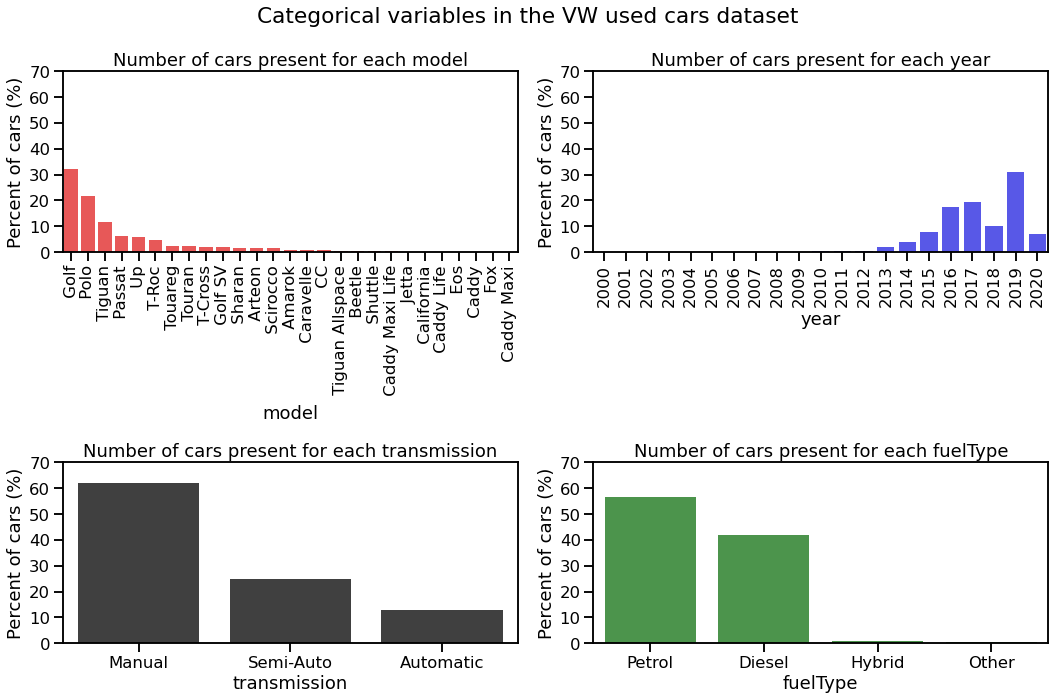

In [115]:
sns.set_context('talk')

plt.figure(figsize=(15,10))

# ffor row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'red', 90, np.arange(0,71,10))

# for row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'blue', 90, np.arange(0,71,10))

# for row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'black', 0, np.arange(0,71,10))

# for row 2, column 2
plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', 'green', 0, np.arange(0,71,10))

# writing the title for all the plots
plt.suptitle("Categorical variables in the VW used cars dataset")

# keeping the individual plots separate from each other
plt.tight_layout()

# now displaying the plots
plt.show()

Scatter Plot

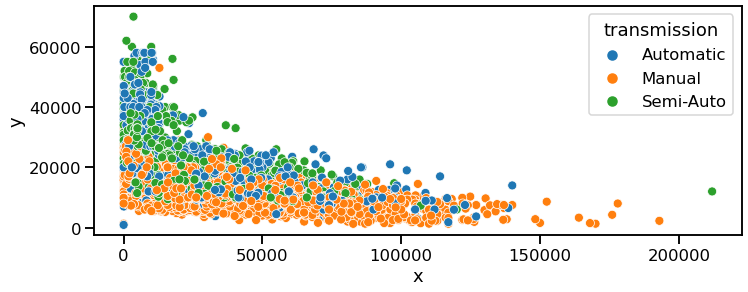

In [131]:
plt.figure(figsize=(20,12))

#mileage vs price
plt.subplot(3,2,1)
sns.scatterplot(x='mileage',y='price', data=df, hue='transmission')

plt.xlabel('x')
plt.ylabel('y')

plt.xticks()
plt.yticks()

plt.tight_layout()
plt.show()